In [1]:
import keras
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dropout, Embedding
import pandas as pd
import sklearn
import sklearn.preprocessing
import datetime
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\carve\AppData\Local\Continuum\anaconda3a\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\carve\AppData\Local\Continuum\anaconda3a\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\carve\AppData\Local\Continuum\anaconda3a\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Us

In [2]:
# key='6faab3f9136645d4942ff8501eec69a125b0c112'

# df = pdr.get_data_tiingo('DIA', api_key=key)
# df.to_csv("DIA.csv")

### Import Dataset

In [3]:
import requests
from bs4 import BeautifulSoup
import csv


In [4]:
# url = 'https://finance.yahoo.com/quote/%5EDJI/'

# response = requests.get(url)
# soup = BeautifulSoup(response.text, 'lxml')
# print(soup)
# price = soup.find_all('div',{'class':"My(6px) Pos(r) smartphone_Mt(6px)"})[0].find('span').text
# print(price)

In [5]:
data = pd.read_csv("DJI.csv")

In [6]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
248,10/23/2020,28409.65039,28436.51953,28149.82031,28335.57031,28335.57031,347300000
249,10/26/2020,28185.82031,28185.82031,27370.16016,27685.38086,27685.38086,404150000
250,10/27/2020,27651.17969,27707.68945,27457.96094,27463.18945,27463.18945,366400000
251,10/28/2020,27102.14063,27102.14063,26497.39063,26519.94922,26519.94922,496150000
252,10/29/2020,26480.98047,26891.89063,26290.77930,26659.10938,26659.10938,419770000


In [7]:
print('Shape of data',data.shape)

Shape of data (253, 7)


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### We want to predict the adjusted closing price

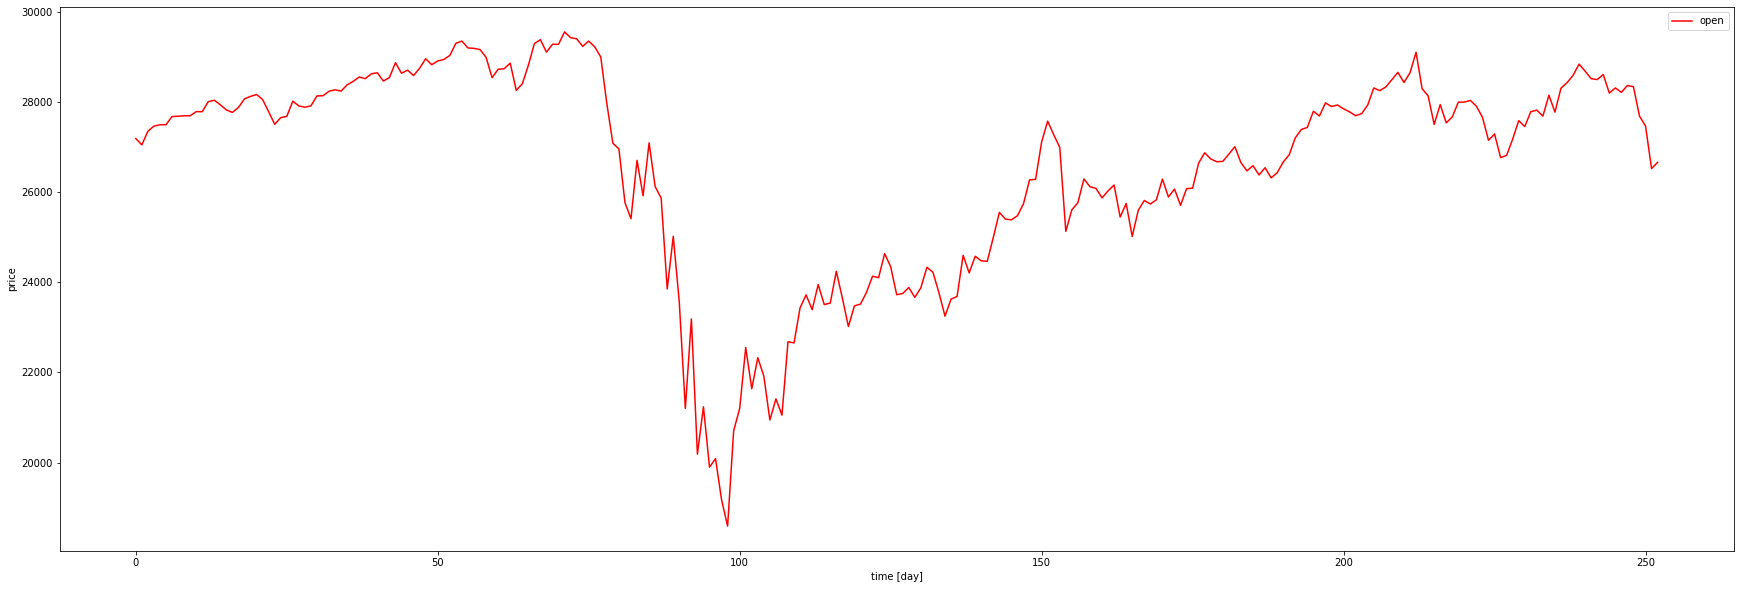

In [9]:
plt.figure(figsize = (30,10))

plt.plot(data['Adj Close'].values, color='red', label='open')

plt.xlabel('time [day]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

### Data Cleaning

In [10]:
Training_Set = data.iloc[:,5:6]
Training_Set

,Adj Close
0,27186.68945
1,27046.23047
2,27347.35938
3,27462.10938
4,27492.63086
...,...
248,28335.57031
249,27685.38086
250,27463.18945
251,26519.94922


In [11]:
Training_Set.shape

(253, 1)

In [12]:
# Converting into numpy array

Training_Set.values

array([[27186.68945],
       [27046.23047],
       [27347.35938],
       [27462.10938],
       [27492.63086],
       [27492.56055],
       [27674.80078],
       [27681.24023],
       [27691.49023],
       [27691.49023],
       [27783.58984],
       [27781.96094],
       [28004.89063],
       [28036.2207 ],
       [27934.01953],
       [27821.08984],
       [27766.28906],
       [27875.61914],
       [28066.4707 ],
       [28121.67969],
       [28164.     ],
       [28051.41016],
       [27783.03906],
       [27502.81055],
       [27649.7793 ],
       [27677.78906],
       [28015.06055],
       [27909.59961],
       [27881.7207 ],
       [27911.30078],
       [28132.05078],
       [28135.38086],
       [28235.89063],
       [28267.16016],
       [28239.2793 ],
       [28376.96094],
       [28455.08984],
       [28551.5293 ],
       [28515.44922],
       [28621.39063],
       [28645.25977],
       [28462.14063],
       [28538.43945],
       [28868.80078],
       [28634.88086],
       [28

#### normalize data

In [13]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
Train= min_max_scaler.fit_transform(Training_Set)
Train

array([[0.78422988],
       [0.77141369],
       [0.79889023],
       [0.80936061],
       [0.81214555],
       [0.81213913],
       [0.82876766],
       [0.82935523],
       [0.83029049],
       [0.83029049],
       [0.83869413],
       [0.8385455 ],
       [0.85888675],
       [0.86174547],
       [0.85242011],
       [0.84211582],
       [0.83711552],
       [0.84709136],
       [0.86450563],
       [0.86954318],
       [0.8734047 ],
       [0.86313143],
       [0.83864388],
       [0.81307439],
       [0.82648457],
       [0.82904033],
       [0.85981471],
       [0.85019191],
       [0.84764809],
       [0.85034713],
       [0.87048949],
       [0.87079335],
       [0.87996437],
       [0.88281756],
       [0.88027357],
       [0.89283635],
       [0.89996523],
       [0.90876486],
       [0.90547273],
       [0.91513937],
       [0.91731731],
       [0.90060858],
       [0.90757048],
       [0.93771433],
       [0.91637028],
       [0.92262057],
       [0.91169843],
       [0.926

In [14]:
Train.shape

(253, 1)

### split train test

In [15]:
# because it is time series. split data as a sequence

X_train =[]
Y_train = []

# Range should be from time steps to the end of the dataset

time_steps =60

for i in range(time_steps,Train.shape[0]):
    # X_train 0 to (time_steps-1)
    X_train.append(Train[i-time_steps:i,0])
    
    # Y would be time_steps value based on past time_steps values
    Y_train.append(Train[i,0])
    
# Convert into Numpy Array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(193, 60)
(193,)


### Apply the reshape

In [16]:
# Shape should be number of [Datapoints, steps,1]
# We convert into 3d vector or #rd Dimension

X_train = np.reshape(X_train, newshape=(X_train.shape[0],X_train.shape[1],1))

In [17]:
# Create the stacked LSTM model

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(1))

# compiling the RNN
regressor.compile(loss='mean_squared_error', optimizer = 'adam')

In [18]:
regressor.fit(X_train, Y_train, epochs = 60, batch_size=32)


Epoch 1/60
193/193 [==============================] - 2s 9ms/step - loss: 0.3009
Epoch 2/60
193/193 [==============================] - 1s 3ms/step - loss: 0.1025
Epoch 3/60
193/193 [==============================] - 1s 3ms/step - loss: 0.0712
Epoch 4/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0463
Epoch 5/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0409
Epoch 6/60
193/193 [==============================] - 1s 3ms/step - loss: 0.0442
Epoch 7/60
193/193 [==============================] - 1s 3ms/step - loss: 0.0357
Epoch 8/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0332
Epoch 9/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0324
Epoch 10/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0322
Epoch 11/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0345
Epoch 12/60
193/193 [==============================] - 1s 4ms/step - loss: 0.0298
Epoch 13/60
193/193 [===

## Test Dataset with the latest data

### Web Scrapping from yahoo finance

In [19]:
# import data for the last few days Oct 29th to Nov 3th
import yfinance as yf
ticker = "DJIA"

df1= yf.download(ticker,start ="2018-11-03", end = "2020-11-04")
df1.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-21,28270.660156,28450.640625,28196.390625,28210.820312,28210.820312,4097750000
2020-10-22,28197.419922,28421.310547,28040.179688,28363.660156,28363.660156,4163630000
2020-10-23,28409.650391,28436.519531,28149.820312,28335.570312,28335.570312,3646570000
2020-10-26,28185.820312,28185.820312,27370.160156,27685.380859,27685.380859,3988080000
2020-10-27,27651.179688,27707.689453,27457.960938,27463.189453,27463.189453,3946990000
2020-10-28,27102.140625,27102.140625,26497.390625,26519.949219,26519.949219,5129860000
2020-10-29,26480.980469,26891.890625,26290.779297,26659.109375,26659.109375,4903070000
2020-10-30,26572.269531,26639.179688,26143.769531,26501.599609,26501.599609,4840450000
2020-11-02,26691.279297,27043.480469,26691.279297,26925.050781,26925.050781,4310590000


In [20]:


# import pandas as pd
# df1 = pd.read_csv('DJI_test.csv')
# df1.tail(10)

In [21]:
latest_data=df1.iloc[-3:]
latest_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-30,26572.269531,26639.179688,26143.769531,26501.599609,26501.599609,4840450000
2020-11-02,26691.279297,27043.480469,26691.279297,26925.050781,26925.050781,4310590000
2020-11-03,27138.689453,27640.210938,27138.689453,27480.029297,27480.029297,4220070000


In [22]:
# data_total = pd.concat((data["Adj Close"],latest_data["Adj Close"]), axis=0)
data_total=df1["Adj Close"]
data_total

Date
2018-11-05    25461.699219
2018-11-06    25635.009766
2018-11-07    26180.300781
2018-11-08    26191.220703
2018-11-09    25989.300781
                  ...     
2020-10-28    26519.949219
2020-10-29    26659.109375
2020-10-30    26501.599609
2020-11-02    26925.050781
2020-11-03    27480.029297
Name: Adj Close, Length: 503, dtype: float64

In [23]:
data_total.shape

(503,)

In [24]:
## Getting the predicted stock price
## We need the last time_steps days = 60 to predict New so we do -60 that would be our inputs

inputs = data_total.values

# We need to reshape
inputs = inputs.reshape(-1,1)



#normalize the dataset
inputs = min_max_scaler.fit_transform(inputs)


X_test =[]
Y_test =[]

time_steps =60
for i in range(time_steps, inputs.shape[0]):
    X_test.append(inputs[i-time_steps:i,0])    
    Y_test.append(inputs[i,0])

    
# Convert into numpy array
X_test = np.array(X_test)
Y_test = np.array(Y_test)



# Reshape before passing to network
X_test = np.reshape(X_test, newshape=(X_test.shape[0],X_test.shape[1],1))

# pass rot model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transoformation to get Values
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)



print(predicted_stock_price )
print(predicted_stock_price.shape)

[[24748.791]
 [24771.434]
 [24806.602]
 [24855.19 ]
 [24911.85 ]
 [24968.352]
 [25016.26 ]
 [25054.432]
 [25085.92 ]
 [25112.78 ]
 [25142.2  ]
 [25179.986]
 [25229.387]
 [25288.53 ]
 [25355.248]
 [25426.766]
 [25498.844]
 [25565.652]
 [25620.945]
 [25661.643]
 [25683.992]
 [25686.21 ]
 [25667.152]
 [25625.541]
 [25562.613]
 [25485.527]
 [25402.002]
 [25321.656]
 [25252.883]
 [25203.291]
 [25178.096]
 [25178.393]
 [25199.73 ]
 [25238.316]
 [25283.232]
 [25323.838]
 [25354.521]
 [25372.746]
 [25379.805]
 [25381.576]
 [25388.541]
 [25407.668]
 [25442.232]
 [25493.723]
 [25560.842]
 [25638.125]
 [25715.555]
 [25783.45 ]
 [25834.412]
 [25868.334]
 [25887.562]
 [25896.363]
 [25898.857]
 [25899.764]
 [25901.803]
 [25908.123]
 [25919.537]
 [25933.223]
 [25946.834]
 [25958.658]
 [25968.12 ]
 [25972.777]
 [25968.99 ]
 [25957.475]
 [25939.748]
 [25911.156]
 [25868.31 ]
 [25808.998]
 [25736.182]
 [25647.076]
 [25544.248]
 [25435.416]
 [25332.857]
 [25246.473]
 [25181.678]
 [25143.076]
 [25130.807]

In [25]:
import sklearn.metrics as metrics
test_data = df1.iloc[time_steps:]
y_pred=test_data.iloc[:,5:6].values
print(y_pred)
mse= metrics.mean_squared_error(y_pred, predicted_stock_price)
print("metrics.mean_squared_error MSE", round(mse,3))

[[ 3359840000]
 [ 3560430000]
 [ 3472690000]
 [ 4099490000]
 [ 3622330000]
 [ 3361970000]
 [ 3827770000]
 [ 3670770000]
 [ 3836700000]
 [ 3641370000]
 [ 3533710000]
 [ 3835450000]
 [ 3559710000]
 [ 3427810000]
 [ 3804380000]
 [ 3645680000]
 [ 3767130000]
 [ 4396930000]
 [ 3972280000]
 [ 3919810000]
 [ 3585690000]
 [ 3786600000]
 [ 3904860000]
 [ 3423130000]
 [ 3749030000]
 [ 3414230000]
 [ 3766150000]
 [ 3469730000]
 [ 5962730000]
 [ 3552190000]
 [ 3620220000]
 [ 3771200000]
 [ 3546800000]
 [ 4237200000]
 [ 3376580000]
 [ 3266050000]
 [ 3372930000]
 [ 3158170000]
 [ 3740700000]
 [ 3500760000]
 [ 3246900000]
 [ 3550240000]
 [ 3015180000]
 [ 3146820000]
 [ 3054030000]
 [ 3007980000]
 [ 3062380000]
 [ 2938540000]
 [ 3688490000]
 [ 3088330000]
 [ 3402210000]
 [ 3602300000]
 [ 3506850000]
 [ 2997950000]
 [ 3635030000]
 [ 3448960000]
 [ 3425280000]
 [ 3248500000]
 [ 3118780000]
 [ 3919330000]
 [ 3645850000]
 [ 3778890000]
 [ 3338120000]
 [ 3181520000]
 [ 3767100000]
 [ 3485790000]
 [ 3638820

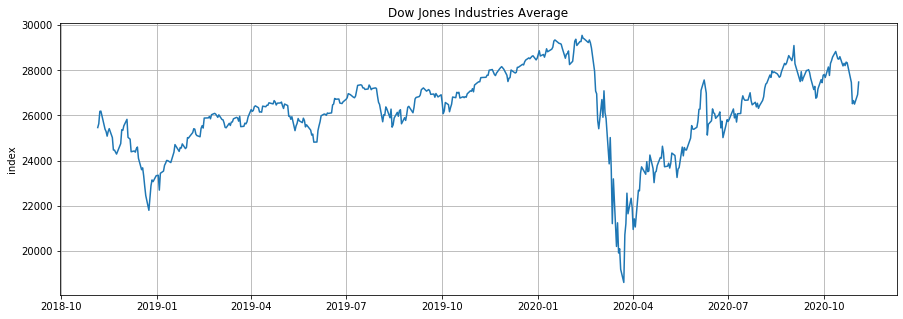

In [26]:
# change the index to date
plt.figure(figsize=(15,5))

plt.plot(df1.index, df1['Adj Close'])

plt.title("Dow Jones Industries Average")
plt.grid(True)
plt.ylabel("index")
plt.show()

In [27]:


prediction = pd.DataFrame(data={
    "Date": test_data.index.to_list(),
    "Adj Close": test_data["Adj Close"].values,
    "Network predicted": [x[0] for x in predicted_stock_price]
})

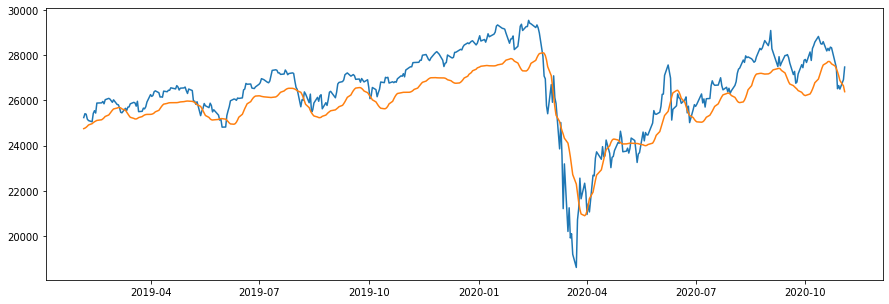

In [28]:
plt.figure(figsize=(15,5))
plt.plot(prediction['Date'],prediction['Adj Close'])
plt.plot(prediction['Date'],prediction['Network predicted'])
plt.show()

In [29]:
prediction

,Date,Adj Close,Network predicted
0,2019-02-04,25239.369141,24748.791016
1,2019-02-05,25411.519531,24771.433594
2,2019-02-06,25390.300781,24806.601562
3,2019-02-07,25169.529297,24855.189453
4,2019-02-08,25106.330078,24911.849609
...,...,...,...
438,2020-10-28,26519.949219,27270.658203
439,2020-10-29,26659.109375,27096.820312
440,2020-10-30,26501.599609,26886.009766
441,2020-11-02,26925.050781,26643.412109


## Make prediction for the next 5 business days

In [30]:
# data_total.append(pd.Series(32,index=["2020-11-03 00:00:00"]))

In [31]:
# demonstrate prediction for next 5 days
# we need the last 60 days

lst_output=[]
time_steps =60
i=0
date_list=["2020-11-04 00:00:00","2020-11-05 00:00:00","2020-11-06 00:00:00","2020-11-07 00:00:00","2020-11-08 00:00:00"]

while(i<5):

    inputs = data_total.values
    inputs = inputs.reshape(-1,1)
    #normalize the dataset
    inputs = min_max_scaler.fit_transform(inputs)


    X_test =[]
    Y_test =[]


    X_test.append(inputs[-60:,0])
    Y_test.append(inputs[i,0])

    
    # Convert into numpy array
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)

    # Reshape before passing to network
    X_test = np.reshape(X_test, newshape=(X_test.shape[0],X_test.shape[1],1))

    # pass rot model
    predicted_stock_price = regressor.predict(X_test)


    # Do inverse Transoformation to get Values
    predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)

    data_total=data_total.append(pd.Series(predicted_stock_price[0],index=[date_list[i]]))
    lst_output.append(predicted_stock_price[0][0])
    i=i+1

print(lst_output)


[26152.404, 25943.701, 25761.312, 25600.133, 25454.506]


In [32]:
pd.DataFrame(lst_output,index=date_list, columns=["Dow Jones Industries Average Index"])

,Dow Jones Industries Average Index
2020-11-04 00:00:00,26152.404297
2020-11-05 00:00:00,25943.701172
2020-11-06 00:00:00,25761.312500
2020-11-07 00:00:00,25600.132812
2020-11-08 00:00:00,25454.505859
